In [9]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import deepcopy

In [10]:
metals = ["Al","Cu","K","Pd","V","W","Ti","Y","Re"]
semi = ["Si"]
insul = ["NaCl"]

In [3]:
def get_mean_data_full(elements):
    for el in elements:
        if el in ["Ti","Y","Re","Si","NaCl"]:
            sizes = range(1,8)
        else:
            sizes = range(1,12)
            
        for i in sizes:
            data = []
            kpd = []
            f = open("../data2/{0}_conv/{1}_atom_TKPTS.csv".format(el,i),"r")
            reader = csv.reader(f,delimiter='\t')
            for row in reader:
                if int(row[0]) in kpd:
                    loc = kpd.index(int(row[0]))
                    data[loc][1] = (data[loc][1]+float(row[1]))/2.
                else:
                    kpd.append(int(row[0]))
                    point = [int(row[0]),float(row[1])]
                    data.append(point)
                    
            data = np.array(data)
            if len(data) >= 1:
                df = pd.DataFrame(data[:,1:],index=data[:,0])#,columns=[str(i)+' atom'])    
            else:
                print("element",el,"size",i)
                
            if i > 1 or el != elements[0]:
                outdf = pd.concat([outdf,df], axis=1)
            else:
                outdf = df

    outdf['mean'] = outdf.mean(axis=1) 
    outdf['count'] = outdf.apply(lambda x: x.count(), axis=1)
    return outdf

In [4]:
def single_atom_scat(el):
    data = []
    kpd = []
    f = open("../data2/{0}_conv/1_atom_full_convergence.csv".format(el),"r")
    reader = csv.reader(f,delimiter='\t')
    for row in reader:
        if int(row[0]) in kpd:
            loc = kpd.index(int(row[0]))
            data[loc][1] = (data[loc][1]+float(row[1]))/2.
        else:
            kpd.append(int(row[0]))
            point = [int(row[0]),float(row[1])]
            data.append(point)
    
    if len(data) > 0:
        data = np.array(data)
    return data

In [5]:
metals_full = get_mean_data_full(metals)
semi_full = get_mean_data_full(semi)
insul_full = get_mean_data_full(insul)

IOError: [Errno 2] No such file or directory: '../data2/Al_conv/1_atom_full_convergence.csv'

In [7]:
def make_scatter_plot_data(data_frame):
    rows = np.asarray(data_frame.index)
    
    data = []
    for row in rows:
        temp = data_frame.ix[:,data_frame.columns.difference(["mean","count"])].loc[row].dropna().values
        for t in temp:
            data.append([int(row),t])
            
    return np.array(data)
        

In [8]:
metals_scat = make_scatter_plot_data(metals_full)
semi_scat = make_scatter_plot_data(semi_full)
insul_scat = make_scatter_plot_data(insul_full)

NameError: name 'metals_full' is not defined

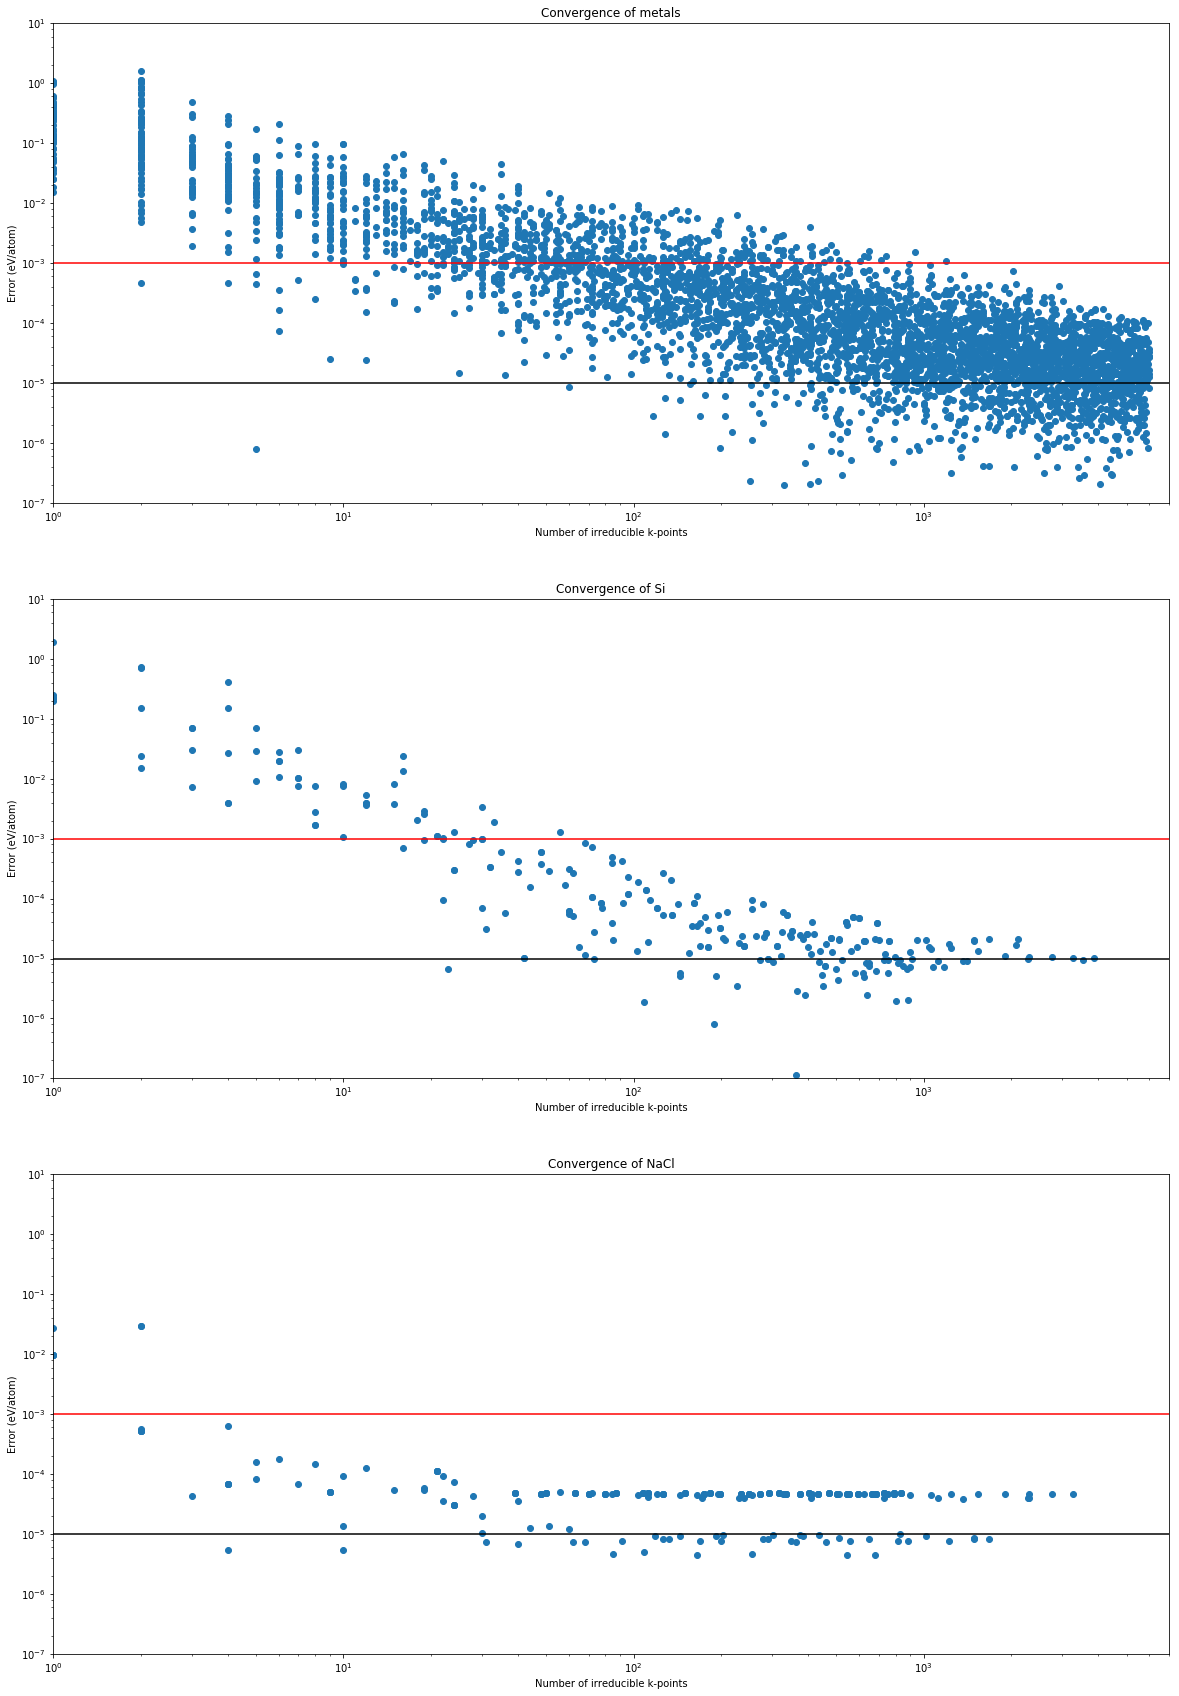

In [23]:
plt.figure(figsize=(20,30))
plt.subplot(311)
plt.scatter(metals_scat[:,0],metals_scat[:,1],label="metals")
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of metals")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(312)
plt.scatter(semi_scat[:,0],semi_scat[:,1],label="Si")
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Si")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(313)
plt.scatter(insul_scat[:,0],insul_scat[:,1],label="NaCl")
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of NaCl")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.savefig("../plots/dense_conv.pdf")
plt.show()
#Muel_scat

In [45]:
#metals = ["Al","Cu","K","Pd","V","W","Ti","Y","Re"]
Al_full = get_mean_data_full(["Al"])
Al_scat = make_scatter_plot_data(Al_full)
Al_1 = single_atom_scat("Al")
Cu_full = get_mean_data_full(["Cu"])
Cu_scat = make_scatter_plot_data(Cu_full)
Cu_1 = single_atom_scat("Cu")
K_full = get_mean_data_full(["K"])
K_scat = make_scatter_plot_data(K_full)
K_1 = single_atom_scat("K")
Pd_full = get_mean_data_full(["Pd"])
Pd_scat = make_scatter_plot_data(Pd_full)
Pd_1 = single_atom_scat("Pd")
V_full = get_mean_data_full(["V"])
V_scat = make_scatter_plot_data(V_full)
V_1 = single_atom_scat("K")
W_full = get_mean_data_full(["W"])
W_scat = make_scatter_plot_data(W_full)
W_1 = single_atom_scat("W")
Ti_full = get_mean_data_full(["Ti"])
Ti_scat = make_scatter_plot_data(Ti_full)
Ti_1 = single_atom_scat("Ti")
Y_full = get_mean_data_full(["Y"])
Y_scat = make_scatter_plot_data(Y_full)
Y_1 = single_atom_scat("Y")
Re_full = get_mean_data_full(["Re"])
Re_scat = make_scatter_plot_data(Re_full)
Re_1 = single_atom_scat("Re")
Si_full = get_mean_data_full(["Si"])
Si_scat = make_scatter_plot_data(Si_full)
Si_1 = single_atom_scat("Si")
NaCl_full = get_mean_data_full(["NaCl"])
NaCl_scat = make_scatter_plot_data(NaCl_full)
NaCl_1 = single_atom_scat("NaCl")

('element', 'Si', 'size', 7)
('element', 'NaCl', 'size', 5)
('element', 'NaCl', 'size', 6)
('element', 'NaCl', 'size', 7)


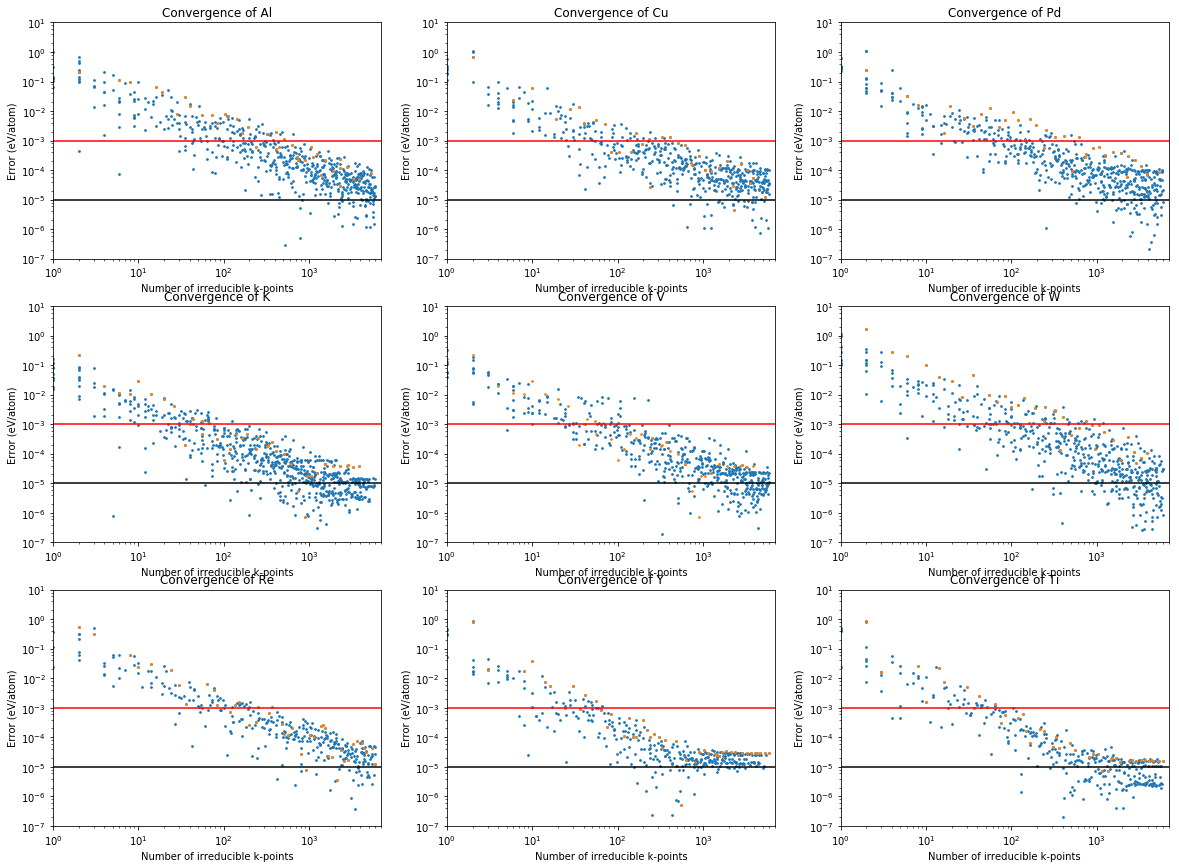

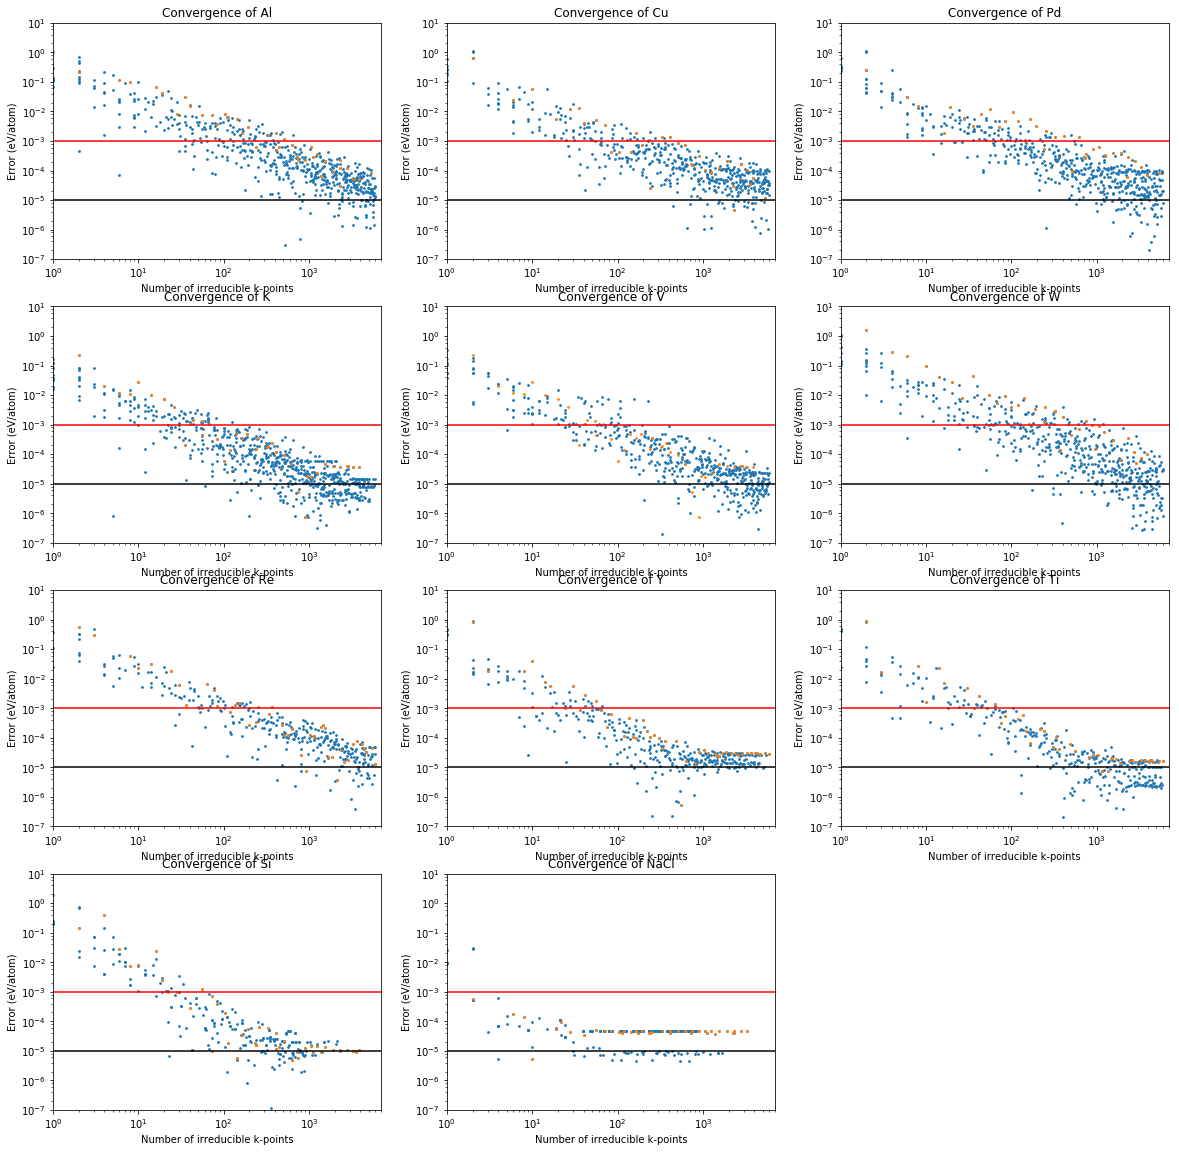

In [47]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
plt.scatter(Al_scat[:,0],Al_scat[:,1],label="Al",s=3)
plt.scatter(Al_1[:,0],Al_1[:,1],label="Al 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Al")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,2)
plt.scatter(Cu_scat[:,0],Cu_scat[:,1],label="Cu",s=3)
plt.scatter(Cu_1[:,0],Cu_1[:,1],label="Cu 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Cu")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,3)
plt.scatter(Pd_scat[:,0],Pd_scat[:,1],label="Pd",s=3)
plt.scatter(Pd_1[:,0],Pd_1[:,1],label="Pd 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Pd")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,4)
plt.scatter(K_scat[:,0],K_scat[:,1],label="K",s=3)
plt.scatter(K_1[:,0],K_1[:,1],label="K 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of K")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,5)
plt.scatter(V_scat[:,0],V_scat[:,1],label="V",s=3)
plt.scatter(V_1[:,0],V_1[:,1],label="V 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of V")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,6)
plt.scatter(W_scat[:,0],W_scat[:,1],label="W",s=3)
plt.scatter(W_1[:,0],W_1[:,1],label="W 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of W")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,7)
plt.scatter(Re_scat[:,0],Re_scat[:,1],label="Re",s=3)
plt.scatter(Re_1[:,0],Re_1[:,1],label="Re 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Re")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,8)
plt.scatter(Y_scat[:,0],Y_scat[:,1],label="Y",s=3)
plt.scatter(Y_1[:,0],Y_1[:,1],label="Y 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Y")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,9)
plt.scatter(Ti_scat[:,0],Ti_scat[:,1],label="Ti",s=3)
plt.scatter(Ti_1[:,0],Ti_1[:,1],label="Ti 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Ti")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,10)
plt.scatter(Si_scat[:,0],Si_scat[:,1],label="Si",s=3)
plt.scatter(Si_1[:,0],Si_1[:,1],label="Si 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of Si")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.subplot(4,3,11)
plt.scatter(NaCl_scat[:,0],NaCl_scat[:,1],label="NaCl",s=3)
plt.scatter(NaCl_1[:,0],NaCl_1[:,1],label="NaCl 1 atom",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of NaCl")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.savefig("../plots/metal_dense_conv_by_element.pdf")
plt.show()

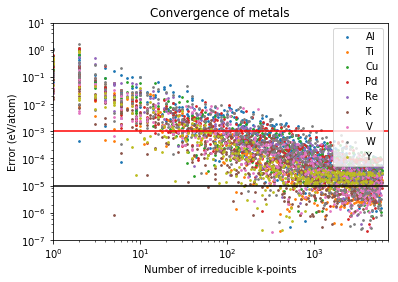

In [32]:
plt.scatter(Al_scat[:,0],Al_scat[:,1],label="Al",s=3)
plt.scatter(Ti_scat[:,0],Ti_scat[:,1],label="Ti",s=3)
plt.scatter(Cu_scat[:,0],Cu_scat[:,1],label="Cu",s=3)
plt.scatter(Pd_scat[:,0],Pd_scat[:,1],label="Pd",s=3)
plt.scatter(Re_scat[:,0],Re_scat[:,1],label="Re",s=3)
plt.scatter(K_scat[:,0],K_scat[:,1],label="K",s=3)
plt.scatter(V_scat[:,0],V_scat[:,1],label="V",s=3)
plt.scatter(W_scat[:,0],W_scat[:,1],label="W",s=3)
plt.scatter(Y_scat[:,0],Y_scat[:,1],label="Y",s=3)
plt.axhline(y=1E-5, xmin=0, xmax=1, hold=None, c='k')
plt.axhline(y=1E-3, xmin=0, xmax=1, hold=None, c='r')
plt.ylabel("Error (eV/atom)")
plt.xlabel("Number of irreducible k-points")
plt.title("Convergence of metals")
plt.yscale('log')
plt.xscale('log')
plt.ylim(1E-7,10)
plt.xlim(0,7E3)
plt.legend(loc='upper right')
plt.show()